In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dfmm.csv')

C:\Users\fouza\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,5) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df

,Unnamed: 0,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Month,week,duration
0,0,docked_bike,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.896400,-87.661000,41.932200,-87.658600,member,4,6,0 days 00:26:49
1,1,docked_bike,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.924400,-87.715400,41.930600,-87.723800,member,4,4,0 days 00:08:09
2,2,docked_bike,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.894500,-87.617900,41.867900,-87.623000,member,4,2,0 days 00:14:23
3,3,docked_bike,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.903000,-87.697500,41.899200,-87.672200,member,4,1,0 days 00:12:12
4,5,docked_bike,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,41.896900,-87.621700,41.892300,-87.612000,member,4,3,0 days 00:05:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1796696,131567,classic_bike,Rhodes Ave & 32nd St,13215,Indiana Ave & 31st St,TA1308000036,41.836208,-87.613533,41.838842,-87.621857,member,12,0,0 days 00:06:00
1796697,131569,electric_bike,Rhodes Ave & 32nd St,13215,Indiana Ave & 31st St,TA1308000036,41.836723,-87.613365,41.838723,-87.621854,member,12,6,0 days 00:04:00
1796698,131570,docked_bike,Rhodes Ave & 32nd St,13215,Indiana Ave & 31st St,TA1308000036,41.836208,-87.613533,41.838842,-87.621857,member,12,2,0 days 00:09:00
1796699,131571,electric_bike,Rhodes Ave & 32nd St,13215,Indiana Ave & 31st St,TA1308000036,41.836734,-87.613394,41.838749,-87.621862,member,12,6,0 days 00:03:00


In [4]:
#data for month 12 is not clean so we will not include it in the analysis
df1 = df.loc[(df['Month'] != 12)]
df1

,Unnamed: 0,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Month,week,duration
0,0,docked_bike,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.896400,-87.661000,41.932200,-87.658600,member,4,6,0 days 00:26:49
1,1,docked_bike,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.924400,-87.715400,41.930600,-87.723800,member,4,4,0 days 00:08:09
2,2,docked_bike,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.894500,-87.617900,41.867900,-87.623000,member,4,2,0 days 00:14:23
3,3,docked_bike,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.903000,-87.697500,41.899200,-87.672200,member,4,1,0 days 00:12:12
4,5,docked_bike,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,41.896900,-87.621700,41.892300,-87.612000,member,4,3,0 days 00:05:24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695203,259710,docked_bike,Wentworth Ave & Cermak Rd,120.0,Michigan Ave & 18th St,273.0,41.853084,-87.631931,41.857813,-87.624550,member,11,6,0 days 00:05:00
1695204,259711,docked_bike,Wentworth Ave & Cermak Rd,120.0,Michigan Ave & 18th St,273.0,41.853084,-87.631931,41.857813,-87.624550,member,11,4,0 days 00:04:00
1695205,259712,docked_bike,Michigan Ave & 18th St,273.0,Indiana Ave & 26th St,147.0,41.857813,-87.624550,41.845687,-87.622481,member,11,0,0 days 00:08:00
1695206,259713,docked_bike,Lake Shore Dr & Monroe St,76.0,Theater on the Lake,177.0,41.880958,-87.616743,41.926277,-87.630834,member,11,5,0 days 00:31:00


In [5]:
df = df1
df.shape

(1695208, 14)

In [6]:
df['duration'] = df['duration'] / np.timedelta64(1, 's')
df

<ipython-input-6-2e0aaed2b4d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration'] = df['duration'] / np.timedelta64(1, 's')


,Unnamed: 0,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,Month,week,duration
0,0,docked_bike,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,41.896400,-87.661000,41.932200,-87.658600,member,4,6,1609.0
1,1,docked_bike,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,41.924400,-87.715400,41.930600,-87.723800,member,4,4,489.0
2,2,docked_bike,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,41.894500,-87.617900,41.867900,-87.623000,member,4,2,863.0
3,3,docked_bike,California Ave & Division St,216,Wood St & Augusta Blvd,657,41.903000,-87.697500,41.899200,-87.672200,member,4,1,732.0
4,5,docked_bike,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,41.896900,-87.621700,41.892300,-87.612000,member,4,3,324.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695203,259710,docked_bike,Wentworth Ave & Cermak Rd,120.0,Michigan Ave & 18th St,273.0,41.853084,-87.631931,41.857813,-87.624550,member,11,6,300.0
1695204,259711,docked_bike,Wentworth Ave & Cermak Rd,120.0,Michigan Ave & 18th St,273.0,41.853084,-87.631931,41.857813,-87.624550,member,11,4,240.0
1695205,259712,docked_bike,Michigan Ave & 18th St,273.0,Indiana Ave & 26th St,147.0,41.857813,-87.624550,41.845687,-87.622481,member,11,0,480.0
1695206,259713,docked_bike,Lake Shore Dr & Monroe St,76.0,Theater on the Lake,177.0,41.880958,-87.616743,41.926277,-87.630834,member,11,5,1860.0


In [7]:
df = df.drop(['start_lat','start_lng','end_lat','end_lng'], axis = 1)
df

,Unnamed: 0,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,Month,week,duration
0,0,docked_bike,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,member,4,6,1609.0
1,1,docked_bike,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,member,4,4,489.0
2,2,docked_bike,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,member,4,2,863.0
3,3,docked_bike,California Ave & Division St,216,Wood St & Augusta Blvd,657,member,4,1,732.0
4,5,docked_bike,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,member,4,3,324.0
...,...,...,...,...,...,...,...,...,...,...
1695203,259710,docked_bike,Wentworth Ave & Cermak Rd,120.0,Michigan Ave & 18th St,273.0,member,11,6,300.0
1695204,259711,docked_bike,Wentworth Ave & Cermak Rd,120.0,Michigan Ave & 18th St,273.0,member,11,4,240.0
1695205,259712,docked_bike,Michigan Ave & 18th St,273.0,Indiana Ave & 26th St,147.0,member,11,0,480.0
1695206,259713,docked_bike,Lake Shore Dr & Monroe St,76.0,Theater on the Lake,177.0,member,11,5,1860.0


In [8]:
df['duration'] = df['duration']/86400
df

,Unnamed: 0,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,member_casual,Month,week,duration
0,0,docked_bike,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,member,4,6,0.018623
1,1,docked_bike,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,member,4,4,0.005660
2,2,docked_bike,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,member,4,2,0.009988
3,3,docked_bike,California Ave & Division St,216,Wood St & Augusta Blvd,657,member,4,1,0.008472
4,5,docked_bike,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,member,4,3,0.003750
...,...,...,...,...,...,...,...,...,...,...
1695203,259710,docked_bike,Wentworth Ave & Cermak Rd,120.0,Michigan Ave & 18th St,273.0,member,11,6,0.003472
1695204,259711,docked_bike,Wentworth Ave & Cermak Rd,120.0,Michigan Ave & 18th St,273.0,member,11,4,0.002778
1695205,259712,docked_bike,Michigan Ave & 18th St,273.0,Indiana Ave & 26th St,147.0,member,11,0,0.005556
1695206,259713,docked_bike,Lake Shore Dr & Monroe St,76.0,Theater on the Lake,177.0,member,11,5,0.021528


aggregating the data

In [14]:
df.drop(df.columns[[0, 6]], axis=1, inplace=True)
df.head()

,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,Month,week,duration
0,docked_bike,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,4,6,0.018623
1,docked_bike,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,4,4,0.005660
2,docked_bike,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,4,2,0.009988
3,docked_bike,California Ave & Division St,216,Wood St & Augusta Blvd,657,4,1,0.008472
4,docked_bike,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,4,3,0.003750


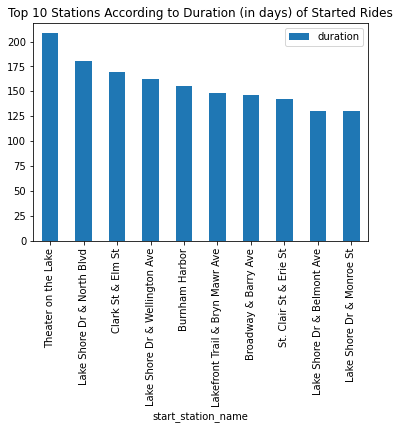

In [53]:
p1 = pd.pivot_table(df, values='duration', index='start_station_name', columns=None, aggfunc='sum', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False) 
p1 = p1.sort_values(ascending = False, by = 'duration')
p1 = p1.iloc[0:10, :]
p1
p1.plot.bar(title = 'Top 10 Stations According to Duration (in days) of Started Rides');

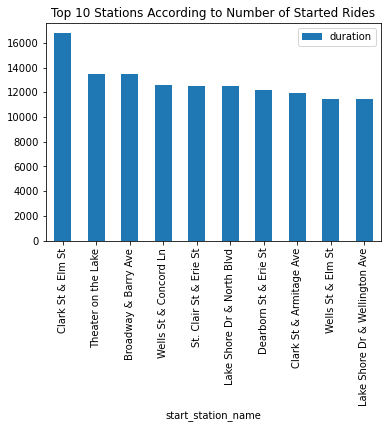

In [56]:
p2 = pd.pivot_table(df, values='duration', index='start_station_name', columns=None, aggfunc='count', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False) 
p2 = p2.sort_values(ascending = False, by = 'duration')
p2 = p2.iloc[0:10, :]
p2
p2.plot.bar(title = 'Top 10 Stations According to Number of Started Rides');

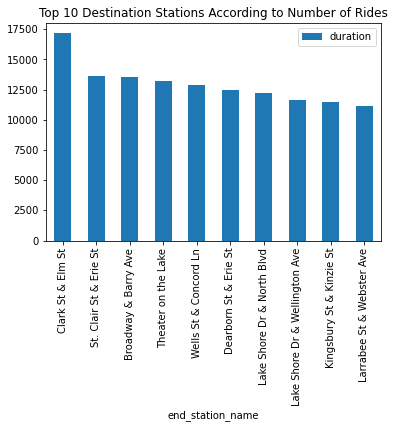

In [57]:
#top ten destinations
p3 = pd.pivot_table(df, values='duration', index='end_station_name', columns=None, aggfunc='count', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False) 
p3 = p3.sort_values(ascending = False, by = 'duration')
p3 = p3.iloc[0:10, :]
p3.plot.bar(title = 'Top 10 Destination Stations According to Number of Rides');

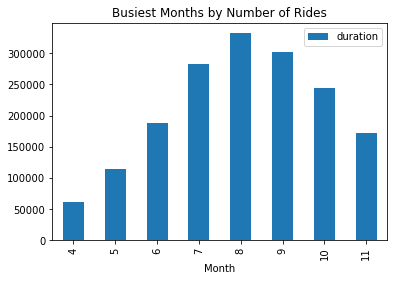

In [91]:
#busiest month
p4 = pd.pivot_table(df, values='duration', index='Month', columns=None, aggfunc='count', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False) 
#p4 = p4.sort_values(ascending = False, by = 'duration')
p4 = p4.iloc[0:10, :]
p4.plot.bar(title = 'Busiest Months by Number of Rides');

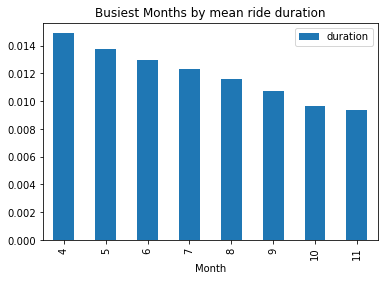

In [89]:
#busiest month according to mean ride duration
p5 = pd.pivot_table(df, values='duration', index='Month', columns=None, aggfunc='mean', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False) 
#p5 = p5.sort_values(ascending = False, by = 'duration')
p5 = p5.iloc[0:10, :]
p5.plot.bar(title = 'Busiest Months by mean ride duration');

In [108]:
#ride duration
p6 = pd.pivot_table(df, values='duration', index='start_station_name', columns=None, aggfunc='sum', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False) 
p6 = p6.sort_values(ascending = False, by = 'duration')
p6
#p5 = p5.iloc[0:10, :]
#p5.plot.bar(title = 'Busiest Months by mean ride duration');

,duration
start_station_name,
Theater on the Lake,208.227280
Lake Shore Dr & North Blvd,180.453681
Clark St & Elm St,168.996574
Lake Shore Dr & Wellington Ave,162.532951
Burnham Harbor,155.292755
...,...
Ashland Ave & 73rd St,0.027778
Elizabeth St & 92nd St,0.026389
Lawndale Ave & 111th St,0.022222


In [103]:
df2['12424']

KeyError: '12424'

In [65]:
p4 = pd.pivot_table(df, values='duration', index='start_station_name', columns='week', aggfunc='count', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False) 
p4 = p4.sort_values(ascending = False, by = [0,1,2,3,4,5,6])
p4 = p4.iloc[0:10,:]
p4
#p4.plot.bar(title = 'Month-wise ride count of Top 10 busiest stations', figsize = (25,5), fontsize = 15);

week,0,1,2,3,4,5,6
start_station_name,,,,,,,
Clark St & Elm St,2027.0,2203.0,2433.0,2457.0,2657.0,2850.0,2140.0
St. Clair St & Erie St,2006.0,2249.0,2370.0,2307.0,2054.0,884.0,673.0
Kingsbury St & Kinzie St,1736.0,1732.0,1876.0,1746.0,1653.0,1394.0,1167.0
Broadway & Barry Ave,1686.0,1780.0,1831.0,1867.0,1989.0,2248.0,2067.0
Dearborn St & Erie St,1652.0,1636.0,1818.0,1869.0,1913.0,1830.0,1477.0
Wells St & Huron St,1502.0,1631.0,1766.0,1789.0,1822.0,1635.0,1271.0
Wells St & Concord Ln,1462.0,1662.0,1789.0,1830.0,1909.0,2152.0,1785.0
Theater on the Lake,1447.0,1548.0,1648.0,1680.0,1835.0,2855.0,2472.0
Desplaines St & Kinzie St,1446.0,1485.0,1649.0,1653.0,1711.0,1766.0,1467.0


In [20]:
p5 = pd.pivot_table(df, values='duration', index='start_station_name', columns='Month', aggfunc='sum', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False) 
p5
p55 = p5.sort_values(ascending = False, by = [4,5,6,7,8,9,10,11])
p55
p55 = p55.iloc[0:10,:]
p55

Month,4,5,6,7,8,9,10,11
start_station_name,,,,,,,,
Wabash Ave & Wacker Pl,42.168310,3.783171,6.725000,5.988889,6.005556,5.935417,3.857639,2.627083
Latrobe Ave & Chicago Ave,37.648009,NaN,0.230556,0.086111,0.093750,0.118750,0.041667,0.000694
Honore St & Division St,26.877373,3.741181,6.406944,8.286111,8.228472,7.752083,5.409722,2.588194
Clybourn Ave & Division St,8.715405,1.953808,3.602778,4.805556,4.290278,4.168056,3.206250,2.344444
Halsted St & Maxwell St,7.784826,3.551771,3.815972,4.345139,4.176389,3.430556,3.018056,1.753472
Dearborn St & Erie St,7.238681,10.784711,14.632639,20.753472,20.215972,17.065278,13.866667,9.426389
Halsted St & Willow St,6.667292,5.717176,7.145833,10.681944,10.226389,18.760417,5.096528,3.411111
Clark St & Elm St,6.409062,12.801400,20.630556,31.849306,34.335417,27.271528,21.941667,13.757639
St. Clair St & Erie St,6.186238,12.896956,15.986111,23.895833,26.304167,22.209028,20.805556,13.731944


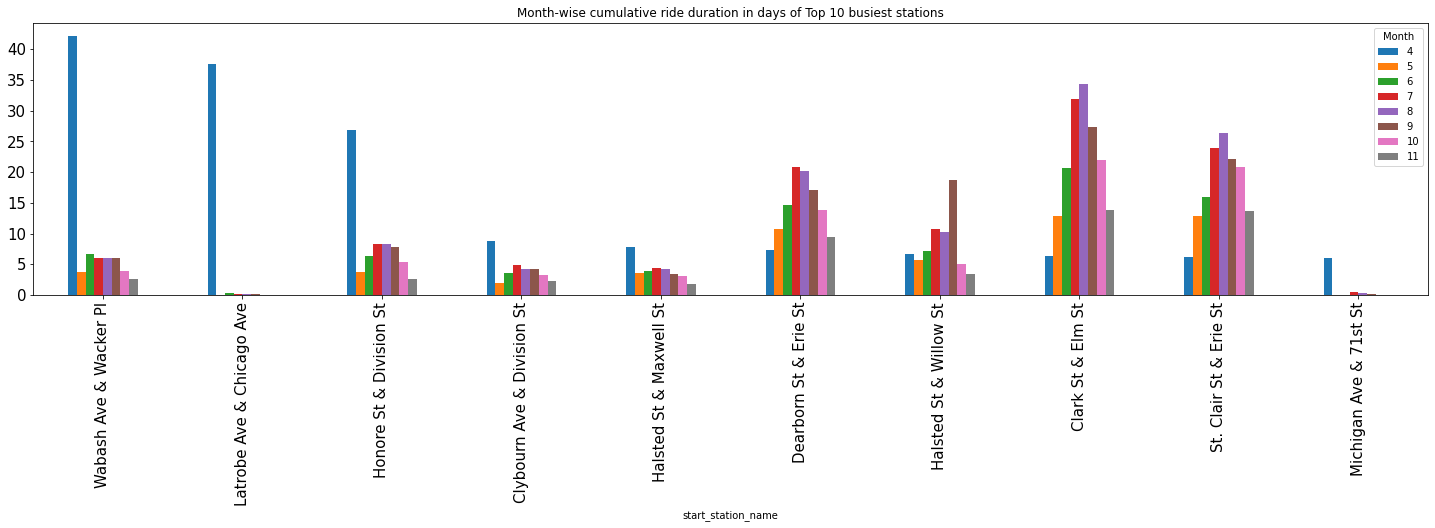

In [22]:
p55.plot.bar(title = 'Month-wise cumulative ride duration in days of Top 10 busiest stations', figsize = (25,5), fontsize = 15);

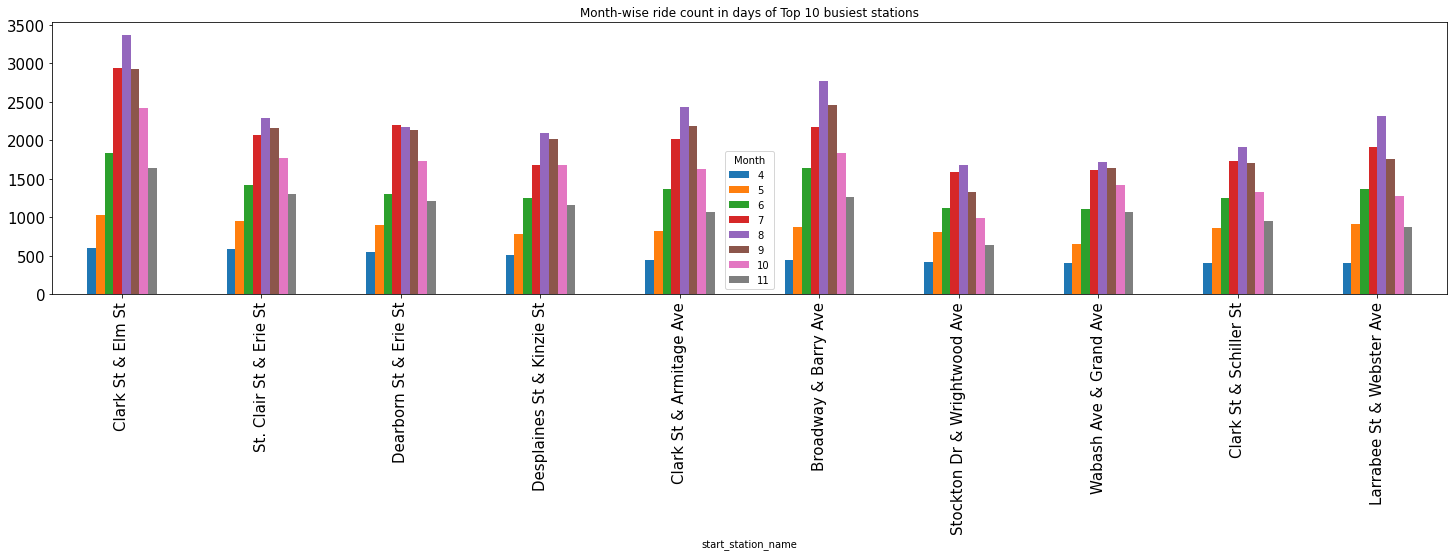

In [23]:
p6 = pd.pivot_table(df, values='duration', index='start_station_name', columns='Month', aggfunc='count', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False) 
p6
p66 = p6.sort_values(ascending = False, by = [4,5,6,7,8,9,10,11])
p66
p66 = p66.iloc[0:10,:]
p66.plot.bar(title = 'Month-wise ride count in days of Top 10 busiest stations', figsize = (25,5), fontsize = 15);

In [43]:
p7 = pd.pivot_table(df, values='duration', index='end_station_name', columns=None, aggfunc='sum', fill_value=None, margins=False, dropna=True, margins_name='All', observed=False) 
p77 = p7.sort_values(ascending = False, by = 'duration')
p77 = p77.iloc[0:10,:]
#p77.plot.bar(title = 'Month-wise ride count in days of Top 10 busiest stations', figsize = (25,5), fontsize = 15);
p77

,duration
end_station_name,
Theater on the Lake,220.934086
Lake Shore Dr & North Blvd,181.063981
Clark St & Elm St,166.858345
Lake Shore Dr & Wellington Ave,159.961713
Burnham Harbor,159.856944
Lakefront Trail & Bryn Mawr Ave,152.806910
Broadway & Barry Ave,150.057847
St. Clair St & Erie St,142.229363
Lake Shore Dr & Monroe St,136.236887


In [45]:
dfdb = df.loc[(df['rideable_type'] == 'docked_bike')]
dfdb

,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,Month,week,duration
0,docked_bike,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152,4,6,0.018623
1,docked_bike,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499,4,4,0.005660
2,docked_bike,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255,4,2,0.009988
3,docked_bike,California Ave & Division St,216,Wood St & Augusta Blvd,657,4,1,0.008472
4,docked_bike,Mies van der Rohe Way & Chicago Ave,173,Streeter Dr & Grand Ave,35,4,3,0.003750
...,...,...,...,...,...,...,...,...
1695203,docked_bike,Wentworth Ave & Cermak Rd,120.0,Michigan Ave & 18th St,273.0,11,6,0.003472
1695204,docked_bike,Wentworth Ave & Cermak Rd,120.0,Michigan Ave & 18th St,273.0,11,4,0.002778
1695205,docked_bike,Michigan Ave & 18th St,273.0,Indiana Ave & 26th St,147.0,11,0,0.005556
1695206,docked_bike,Lake Shore Dr & Monroe St,76.0,Theater on the Lake,177.0,11,5,0.021528


In [46]:
dfeb = df.loc[(df['rideable_type'] == 'electric_bike')]
dfeb

,rideable_type,start_station_name,start_station_id,end_station_name,end_station_id,Month,week,duration
363869,electric_bike,Southport Ave & Waveland Ave,227,Broadway & Sheridan Rd,256,7,4,0.004167
363870,electric_bike,Broadway & Sheridan Rd,256,Halsted St & Roscoe St,299,7,4,0.002083
363871,electric_bike,Broadway & Sheridan Rd,256,Southport Ave & Waveland Ave,227,7,4,0.004861
364065,electric_bike,Calumet Ave & 18th St,338,Wabash Ave & 16th St,72,7,4,0.004861
364066,electric_bike,Ashland Ave & Chicago Ave,350,Ashland Ave & Augusta Blvd,30,7,4,0.005556
...,...,...,...,...,...,...,...,...
1694890,electric_bike,Peoria St & Jackson Blvd,134.0,Hermitage Ave & Polk St,261.0,11,5,0.005556
1694891,electric_bike,Wolcott Ave & Polk St,342.0,Peoria St & Jackson Blvd,134.0,11,4,0.005556
1694892,electric_bike,Shedd Aquarium,3.0,Peoria St & Jackson Blvd,134.0,11,6,0.011111
1694893,electric_bike,Green St & Madison St,198.0,Michigan Ave & 8th St,623.0,11,6,0.010417


In [48]:
df['rideable_type'].unique()
#dfcb = df.loc[(df['rideable_type'] == 'classic_bike')]
#dfcb

array(['docked_bike', 'electric_bike'], dtype=object)